In [1]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Define the dataset as a Pandas DataFrame
data = pd.read_csv(r"https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv")

In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# Customize Linear Regression Class

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
# Convert the input and output variables to PyTorch tensors
x = torch.tensor(data['Height'].values).reshape(-1, 1).float()    #feature variable
y = torch.tensor(data['Weight'].values).reshape(-1, 1).float()    #target variable

#splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled).float()
X_test_tensor = torch.tensor(X_test_scaled).float()

# Define the LR model and print its parameters
lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))

The parameters:  [Parameter containing:
tensor([[-0.8784]], requires_grad=True), Parameter containing:
tensor([-0.2429], requires_grad=True)]


In [8]:
# Train the LR model on the data
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(lr.parameters(), lr=0.01)
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    yhat = lr(X_train_tensor)
    loss = criterion(yhat, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}: Loss: {loss.item():.4f}")

Epoch 1/1000: Loss: 27089.8691
Epoch 2/1000: Loss: 26023.0371
Epoch 3/1000: Loss: 24998.4551
Epoch 4/1000: Loss: 24014.4453
Epoch 5/1000: Loss: 23069.4004
Epoch 6/1000: Loss: 22161.7812
Epoch 7/1000: Loss: 21290.1055
Epoch 8/1000: Loss: 20452.9414
Epoch 9/1000: Loss: 19648.9375
Epoch 10/1000: Loss: 18876.7656
Epoch 11/1000: Loss: 18135.1738
Epoch 12/1000: Loss: 17422.9492
Epoch 13/1000: Loss: 16738.9297
Epoch 14/1000: Loss: 16081.9941
Epoch 15/1000: Loss: 15451.0762
Epoch 16/1000: Loss: 14845.1426
Epoch 17/1000: Loss: 14263.2031
Epoch 18/1000: Loss: 13704.3096
Epoch 19/1000: Loss: 13167.5479
Epoch 20/1000: Loss: 12652.0400
Epoch 21/1000: Loss: 12156.9473
Epoch 22/1000: Loss: 11681.4609
Epoch 23/1000: Loss: 11224.8037
Epoch 24/1000: Loss: 10786.2295
Epoch 25/1000: Loss: 10365.0225
Epoch 26/1000: Loss: 9960.4961
Epoch 27/1000: Loss: 9571.9893
Epoch 28/1000: Loss: 9198.8662
Epoch 29/1000: Loss: 8840.5195
Epoch 30/1000: Loss: 8496.3633
Epoch 31/1000: Loss: 8165.8359
Epoch 32/1000: Loss: 78

In [9]:
# Make predictions with the trained LR model
y_pred = lr(X_test_tensor)
test_loss = criterion(y_pred, y_test)
print("The test loss MSE: ", test_loss.item())

#converting tensor to numpy to evaluate MAE and RMSE
X_test_numpy = X_test.detach().numpy()
y_test_numpy = y_test.detach().numpy()
y_pred_numpy = y_pred.detach().numpy()
rmse = mean_squared_error(y_test_numpy, y_pred_numpy, squared=False)
mae = mean_absolute_error(y_test_numpy, y_pred_numpy)
print("The test loss RMSE: ", rmse)
print("The test loss MAE: ", mae)

The test loss MSE:  148.36244201660156
The test loss RMSE:  12.180411
The test loss MAE:  9.709433


In [10]:
#Performance  metrics
r2 = r2_score(y_test_numpy, y_pred_numpy)
adj_r2 = 1 - (((1 - r2) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1))
print("R2 score on test set:", r2)
print("Adjusted R2 score on test set:", adj_r2)

R2 score on test set: 0.8577297347197856
Adjusted R2 score on test set: 0.8576822796613199


In [13]:
# Save the LR model to a .pth file
torch.save(lr.state_dict(), 'linear_regression_model.pth')

In [14]:
###load model
#lr = LR(1, 1)
#lr.load_state_dict(torch.load('linear_regression_model.pth'))

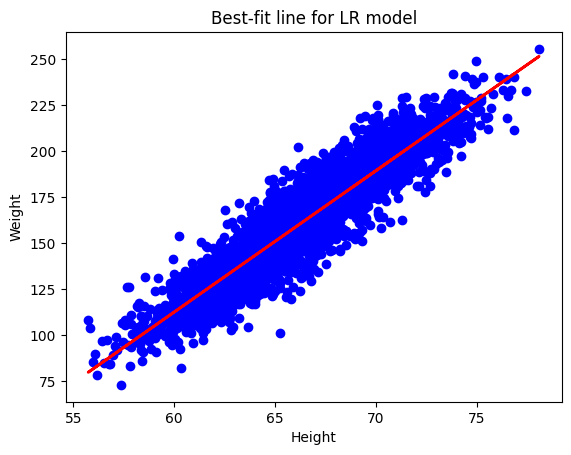

In [11]:
# Plot the predicted values against the actual values on the test set
plt.scatter(X_test_numpy, y_test_numpy, color='blue')
plt.plot(X_test_numpy, y_pred_numpy, color='red', linewidth=2)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Best-fit line for LR model')
plt.show()